In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Collect all data
files = os.listdir('Data')

data = []
for file in files:
    data.append(np.genfromtxt(os.path.join('Data', file), delimiter=',', skip_header=6, names=True))

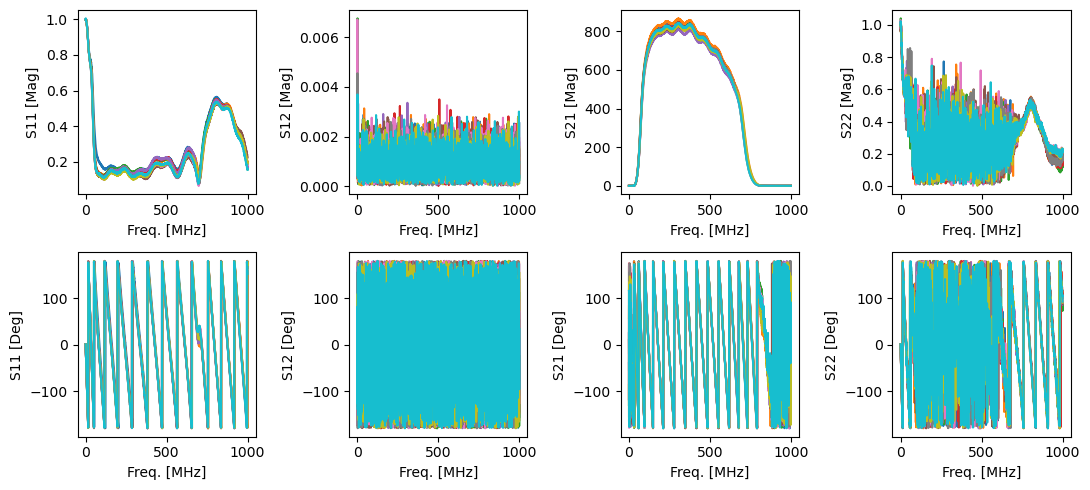

In [3]:
# Display all unmodified data 
fig, axs = plt.subplots(2, 4, figsize=(11, 5))

param_names = ['S11', 'S12', 'S21', 'S22']

for ax, str in zip(axs[0], param_names):
    ax.set_xlabel('Freq. [MHz]')
    ax.set_ylabel(str + ' [Mag]')
    for i in range(len(data)):
        ax.plot(data[0]['FreqHz']/1e6, data[i][str+'MAG'])

for ax, str in zip(axs[1], param_names):
    ax.set_xlabel('Freq. [MHz]')
    ax.set_ylabel(str + ' [Deg]')
    for i in range(len(data)):
        ax.plot(data[0]['FreqHz']/1e6, data[i][str+'DEG'])

fig.tight_layout()

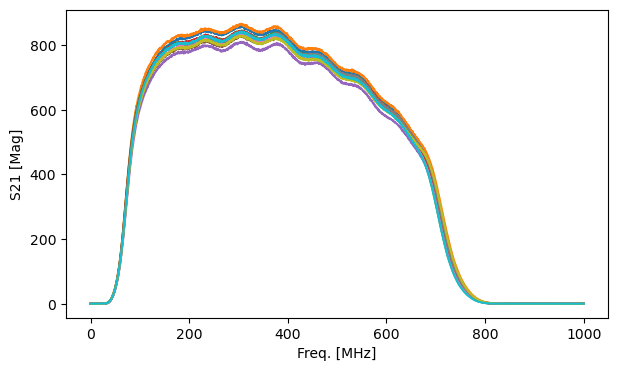

In [5]:
# Only amplification magnitude
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_xlabel('Freq. [MHz]')
ax.set_ylabel('S21 [Mag]')
for i in range(len(data)):
    ax.plot(data[0]['FreqHz']/1e6, data[i]['S21MAG'])

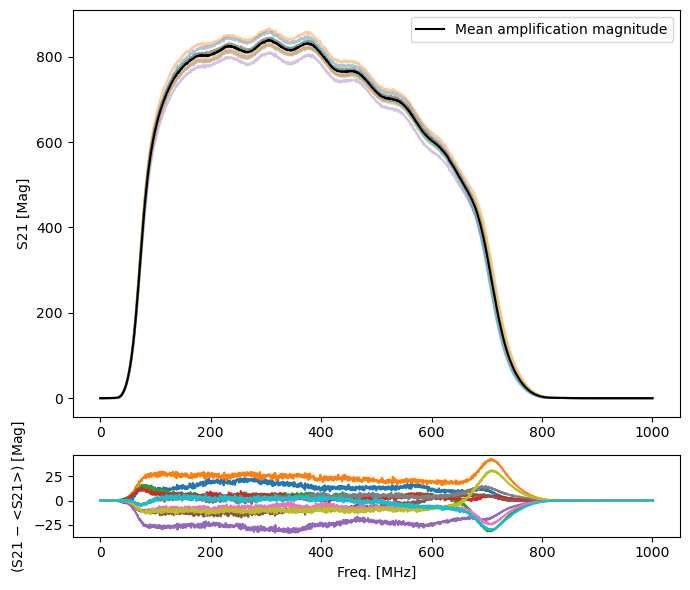

In [48]:
# Mean amplification magnitude 

sum_mag_perFreq = []
for num in range(len(data[0]['FreqHz'])): 
    _ = [data[i]['S21MAG'][num] for i in range(len(data))]
    s = np.sum(_)
    sum_mag_perFreq.append(s)
mean_S21_mag = np.array(sum_mag_perFreq)/len(data)

fig, axs = plt.subplots(2, 1, figsize=(7, 6), height_ratios=[5, 1])
axs[0].set_ylabel('S21 [Mag]')
for i in range(len(data)):
    axs[0].plot(data[0]['FreqHz']/1e6, data[i]['S21MAG'], alpha=0.4)
axs[0].plot(data[0]['FreqHz']/1e6, mean_S21_mag, color='k', label='Mean amplification magnitude')
axs[0].legend()

diff_to_mean = []
for i in range(len(data)):
    diff = []
    for num in range(len(data[0]['FreqHz'])): 
        df = data[i]['S21MAG'][num] - mean_S21_mag[num]
        diff.append(df)
    diff_to_mean.append(diff)
    
axs[1].set_xlabel('Freq. [MHz]')
axs[1].set_ylabel(r'(S21 $-$ <S21>) [Mag]')
for i in range(len(diff_to_mean)):
    axs[1].plot(data[0]['FreqHz']/1e6, diff_to_mean[i])

fig.tight_layout()

In [62]:
# Bandwidth

# Cutoff frequencies at 1/sqrt(2) of maximum
cutoff_mags = []
for i in range(len(data)):
    theo_cutoff_mags = 1/np.sqrt(2) * max(data[i]['S21MAG'])
    cutoff_mags.append(min(data[i]['S21MAG'], key=lambda x:abs(x-theo_cutoff_mags)))




In [68]:
np.where(data[0]['S21MAG'] == cutoff_mags[0])[0][0]

189

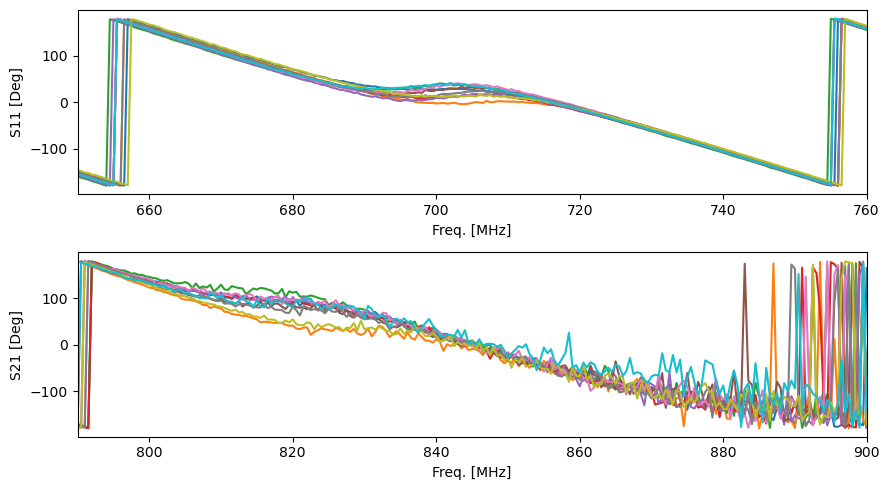

In [49]:
fig, axs = plt.subplots(2, 1, figsize=(9, 5))

# Window for S11 650-760 MHz
axs[0].set_xlabel('Freq. [MHz]')
axs[0].set_ylabel('S11 [Deg]')
for i in range(len(data)):
    axs[0].plot(data[0]['FreqHz']/1e6, data[i]['S11DEG'])
axs[0].set_xlim(xmin=650, xmax=760)

# Window for S21 790-900 MHz 
axs[1].set_xlabel('Freq. [MHz]')
axs[1].set_ylabel('S21 [Deg]')
for i in range(len(data)):
    axs[1].plot(data[0]['FreqHz']/1e6, data[i]['S21DEG'])
axs[1].set_xlim(xmin=790, xmax=900)

fig.tight_layout()